Dataset : https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

**Import Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Data Collection and Data Preprocessing**

Data Collection leads to collect data for training and testing purpose

Data preprocessing transforms the data into a format that is more easily and effectively processed in machine learning tasks.

In [ ]:
#transferring a dataset to a pandas dataframe to provide easier access to the data
wine_dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Wine Quality Prediction/Wine Quality dataset.csv')

#checking data format print 5 rows of data
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#checking data row and column for spliting the data
wine_dataset.shape

(1599, 12)

In [ ]:
#Checking missing values in dataset
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Data Analysis and visualization**

In [ ]:
#Statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


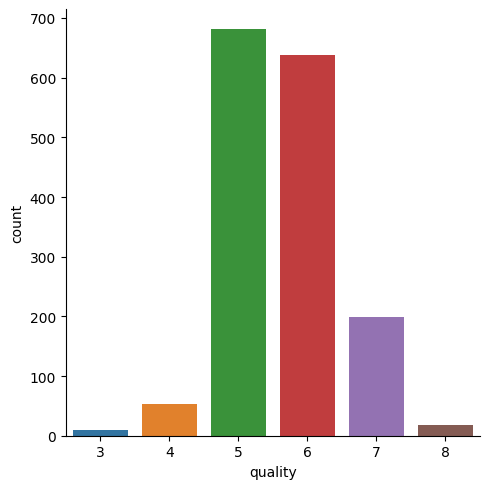

In [ ]:
#number of values for each quality
sns.catplot(x='quality', data=wine_dataset, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

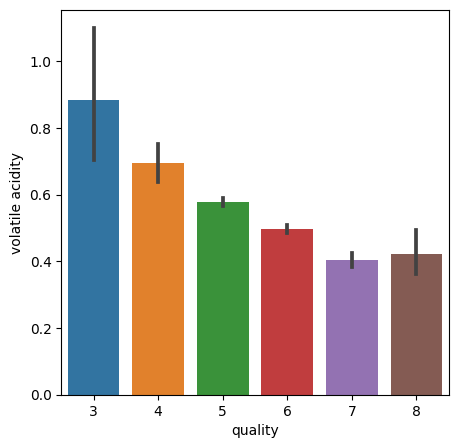

In [ ]:
#volatile acidity vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=wine_dataset)

As the above diagram volatile acidity and quality are inversely proportional to each other

ex- higher the volatile acidity, lower the quality

Checking other feature relationship with quality

<Axes: xlabel='quality', ylabel='citric acid'>

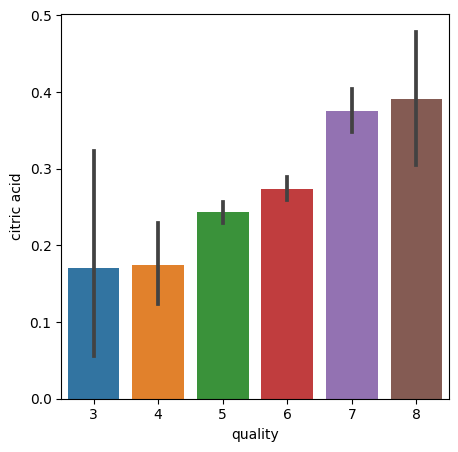

In [ ]:
#citric acid vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=wine_dataset)

citric acid and quality directly proportional to each other

<Axes: xlabel='quality', ylabel='residual sugar'>

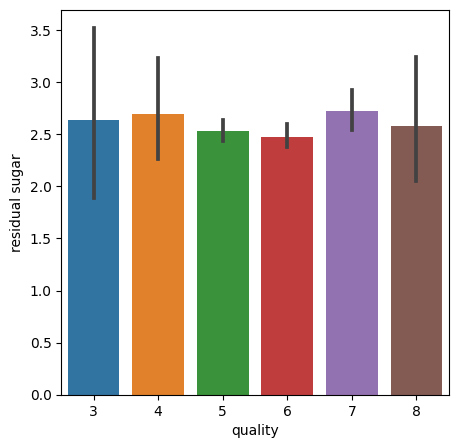

In [ ]:
#residual sugar vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='residual sugar', data=wine_dataset)

residual sugar does not effect the quality of the wine as its value is apporex same for each quality

<Axes: xlabel='quality', ylabel='chlorides'>

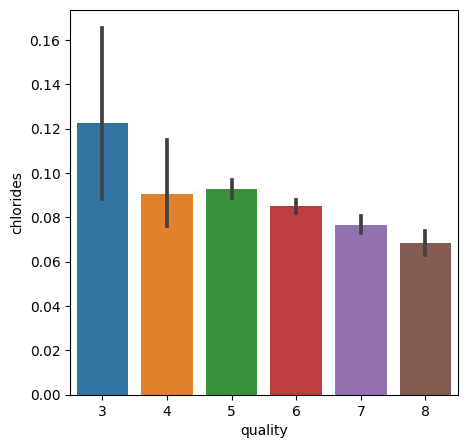

In [ ]:
#chlorides vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='chlorides', data=wine_dataset)

chlorides is inversely proportional to quality

**Correlation of every feature to the quality column**

<Axes: >

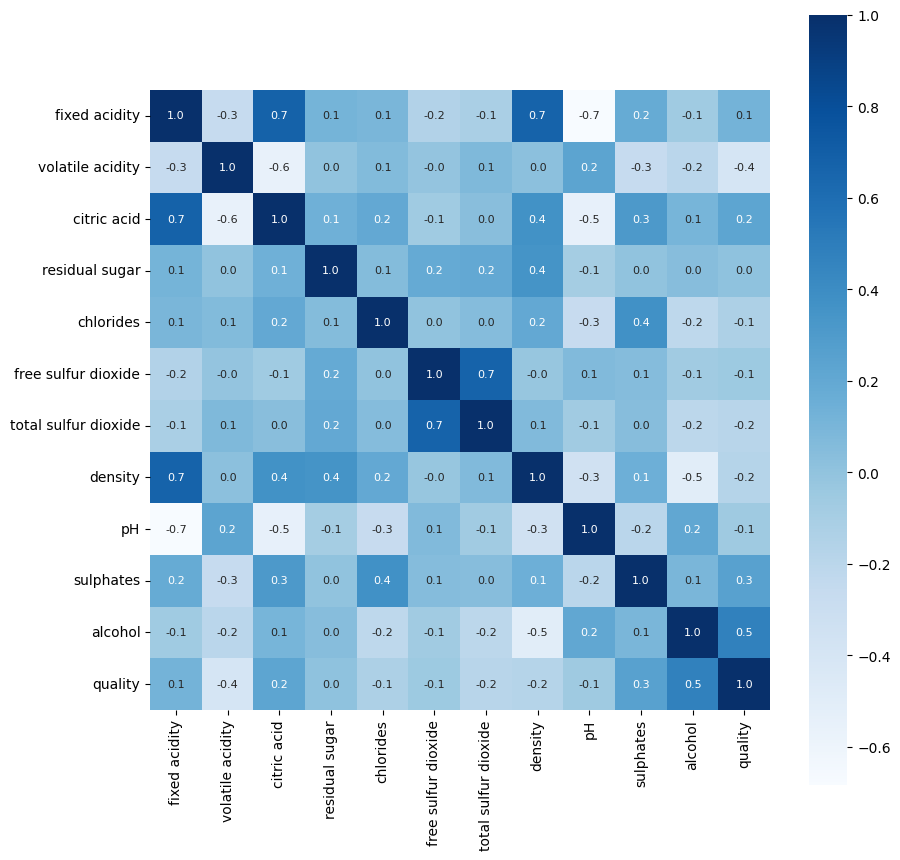

In [ ]:
correlation = wine_dataset.corr()

# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap="Blues")

In [ ]:
#Data Preprocessing

#Saperate the data and label
X=wine_dataset.drop('quality', axis=1)

print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

**Label Binarization**

To make label as good or bad insted of 3,4,5,6,7,8

3,4,5,6--> bad quality(0)

7,8--> good quality(1)

In [ ]:
Y=wine_dataset['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


**Splitting Data into Training data and Testing data**

**Train Test Split:** Split arrays or matrices into random train and test subsets.

Spliting data into four variables X_train, X_text, Y_train, Y_test

The X_train variable will hold all of the training data, and the Y_train variable will have the label of the X_tarin data.

Data for evoluation will be store in the X_test label of X_test data will store in the Y_test variable.

---

**test-size:** it defines the ratio of data which divide into traning and testing data.

0.1 = 10% data for testing and rest 90% data for traning

0.2 = 20% data for testing and rest 80% data for traning

---

**Stratify:**  This will be used by the train_test_split() function to ensure that both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.Like in this model we use Stratify = Y as it divide equal 1 and 0 to the train and test data

**Random State:** The random state hyperparameter in the train_test_split() function controls the shuffling process. With random_state=None , we get different train and test sets across different executions and the shuffling process is out of control. With random_state=0 or 1 or 2, we get the same train and test sets across different executions.


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


**Model Evaluation:** Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses.

**Accuracy score:** A function imported from sklearn.metrics. Accuracy score in machine learning is an evaluation metric that measures the number of correct predictions made by a model in relation to the total number of predictions made. We calculate it by dividing the number of correct predictions by the total number of predictions.

First Model Support Vector Machine

In [ ]:
classifier= svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
#predict the outcome in 0 and 1 form
X_train_prediction = classifier.predict(X_train)

#Now compare it with original label i.e Y_train
training_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy Score on the Traning Data:', training_accuracy)

Accuracy Score on the Traning Data: 0.8639562157935887


In [ ]:
#predict the outcome in 0 and 1 form
X_test_prediction = classifier.predict(X_test)

#Now compare it with original label i.e Y_test
test_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy Score on the Traning Data:', test_accuracy)

Accuracy Score on the Traning Data: 0.865625


Test Accuracy from Support Vector Machine is 86%

Now lets train on Random Forest Classifier

Second Model Training

Random Forest Classifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier()

Accuracy Score on the Traning Data

In [ ]:
#predict the outcome in 0 and 1 form
X_train_prediction = model.predict(X_train)

#Now compare it with original label i.e Y_train
training_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy Score on the Traning Data:', training_accuracy)

Accuracy Score on the Traning Data: 1.0


Accuracy Score on the Test Data

In [ ]:
#predict the outcome in 0 and 1 form
X_test_prediction = model.predict(X_test)

#Now compare it with original label i.e Y_test
test_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy Score on the Traning Data:', test_accuracy)

Accuracy Score on the Traning Data: 0.934375


Model is working very well as it is giving 94% accuracy on test data using Random Forest Classifier

Hence Random Forest Classifier is best for this project

**Making a Predictive System**

In [ ]:
input_data=(6.7,0.58,0.08,1.8,0.09699999999999999,15.0,65.0,0.9959,3.28,0.54,9.2)

# Changing the input data into numpy array
input_data_array=np.asarray(input_data)

# Reshape the data as we are predicting for one value
reshaped = input_data_array.reshape(1, -1)

prediction = model.predict(reshaped)
print(prediction)

if(prediction[0]==1):
  print("Good Quality Wine")
else:
  print("Bad Quality Wine")

[0]
Bad Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
